In [1]:
import os
import torch
import numpy as np
from pathlib import Path
import json

In [2]:
# 假设特征存储在 workspace/vifi_features 目录下
workspace_dir = Path("./workspace")
features_dir = workspace_dir / "vifi_features"
dataset_name = "ntu60"  # 可以根据实际情况修改
split = "test"  # 可以是 train, val, test

In [3]:
def load_features(features_dir, dataset_name, split):
    """
    加载指定数据集和分割的特征
    """
    # 假设特征文件命名为 features_gathered.pth
    feature_file = features_dir / f"features_gathered.pth"
    
    if not feature_file.exists():
        print(f"特征文件 {feature_file} 不存在")
        return None
    
    # 加载特征文件
    features = torch.load(feature_file)
    return features

In [9]:
features = load_features(features_dir, dataset_name, split)

if features is not None:
    print("特征文件加载成功!")
    
    # 检查特征内容
    print("\n特征文件包含的键:")
    for key in features.keys():
        print(f"  - {key}")
    
    # 假设特征包含 video_features, text_features, labels, class_names
    if 'features' in features:
        video_features = features['features']
        print(f"\n视频特征形状: {video_features.shape}")
        print(f"视频特征数据类型: {video_features.dtype}")
    
    if 'text_features' in features:
        text_features = features['text_features']
        print(f"\n文本特征形状: {text_features.shape}")
        print(f"文本特征数据类型: {text_features.dtype}")
    
    if 'labels' in features:
        labels = features['labels']
        print(f"\n标签形状: {labels.shape}")
        print(f"标签数据类型: {labels.dtype}")
        print(f"唯一标签数量: {len(np.unique(labels.numpy()))}")
        print(f"标签范围: {labels.min().item()} 到 {labels.max().item()}")
    
    if 'file_names' in features:
        file_names = features['file_names']
        print(f"\n文件名数量: {len(file_names)}")
        print("\n前10个文件名:")
        for i, name in enumerate(file_names[:10]):
            print(f"  {i}: {name}")
        
        # 显示一些样本的标签和对应的文件名
        print("\n前5个样本的标签和文件名:")
        for i in range(min(5, len(labels))):
            label_idx = labels[i].item()
            file_name = file_names[i] if i < len(file_names) else "Unknown"
            print(f"  样本 {i}: 标签={label_idx}, 文件名={file_name}")
    
    # 检查是否有其他信息
    if 'metadata' in features:
        print("\n元数据信息:")
        print(json.dumps(features['metadata'], indent=2))
else:
    print("无法加载特征文件，请检查路径和文件名是否正确")

特征文件加载成功!

特征文件包含的键:
  - features
  - labels
  - filenames
  - num_samples

视频特征形状: torch.Size([18932, 16, 512])
视频特征数据类型: torch.float32

标签形状: torch.Size([18932])
标签数据类型: torch.int64
唯一标签数量: 60
标签范围: 0 到 59


In [6]:
# 查看系统可用字体
import matplotlib.font_manager as fm
fonts = [f.name for f in fm.fontManager.ttflist]
# 打印所有可用字体
print(fonts)

['DejaVu Sans Mono', 'DejaVu Sans', 'DejaVu Serif', 'DejaVu Sans Mono', 'DejaVu Sans Display', 'STIXSizeOneSym', 'STIXNonUnicode', 'DejaVu Serif', 'DejaVu Sans', 'cmmi10', 'STIXGeneral', 'DejaVu Serif', 'DejaVu Serif', 'STIXSizeFourSym', 'cmb10', 'STIXNonUnicode', 'STIXSizeTwoSym', 'STIXSizeFourSym', 'DejaVu Serif Display', 'STIXSizeThreeSym', 'STIXGeneral', 'STIXGeneral', 'STIXSizeTwoSym', 'cmsy10', 'DejaVu Sans', 'DejaVu Sans Mono', 'STIXNonUnicode', 'STIXSizeFiveSym', 'DejaVu Sans', 'cmr10', 'cmss10', 'cmtt10', 'DejaVu Sans Mono', 'cmex10', 'STIXGeneral', 'STIXNonUnicode', 'STIXSizeThreeSym', 'STIXSizeOneSym', 'DejaVu Serif', 'DejaVu Sans', 'DejaVu Serif', 'DejaVu Sans', 'DejaVu Sans Mono', 'DejaVu Sans Mono']


/tmp/ipykernel_650137/1926705979.py:27: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_650137/1926705979.py:27: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_650137/1926705979.py:27: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_650137/1926705979.py:27: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_650137/1926705979.py:27: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_650137/1926705979.py:27: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_650137/1926705979.py:27: UserWarning: Glyph 20998 (\N{CJK UNIFIED I

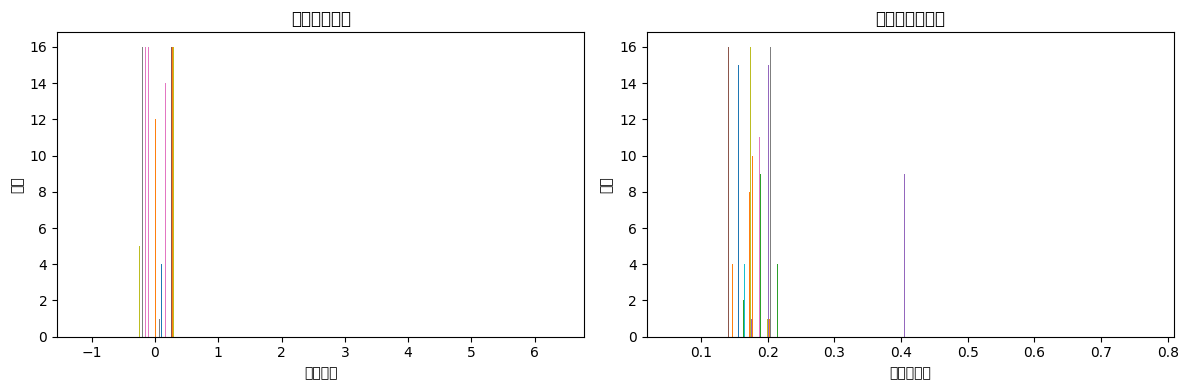

In [7]:
# 设置魔法指令，使matplotlib图形在notebook中正确显示
%matplotlib inline

import matplotlib.pyplot as plt

if features is not None and 'features' in features:
    # 计算特征的均值和标准差
    video_features = features['features']
    feature_mean = video_features.mean(dim=0).numpy()
    feature_std = video_features.std(dim=0).numpy()
    
    # 绘制特征均值分布
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.hist(feature_mean, bins=50)
    plt.title('特征均值分布')
    plt.xlabel('特征均值')
    plt.ylabel('频数')
    
    # 绘制特征标准差分布
    plt.subplot(1, 2, 2)
    plt.hist(feature_std, bins=50)
    plt.title('特征标准差分布')
    plt.xlabel('特征标准差')
    plt.ylabel('频数')
    
    plt.tight_layout()
    plt.show()